## Analysing Heart Failure Clinical Records data 

In [67]:
import pandas as pd
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [68]:
data.shape

(299, 13)

In [69]:
data.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [70]:
print("This is data concerned with the age attribute:\n", data["age"].value_counts() )

This is data concerned with the age attribute:
 60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
42.000     7
72.000     7
40.000     7
80.000     7
85.000     6
62.000     5
52.000     5
68.000     5
61.000     4
73.000     4
59.000     4
49.000     4
51.000     4
82.000     3
69.000     3
90.000     3
46.000     3
64.000     3
48.000     2
66.000     2
54.000     2
95.000     2
77.000     2
57.000     2
78.000     2
60.667     2
44.000     2
67.000     2
41.000     1
79.000     1
81.000     1
86.000     1
43.000     1
47.000     1
87.000     1
56.000     1
94.000     1
Name: age, dtype: int64


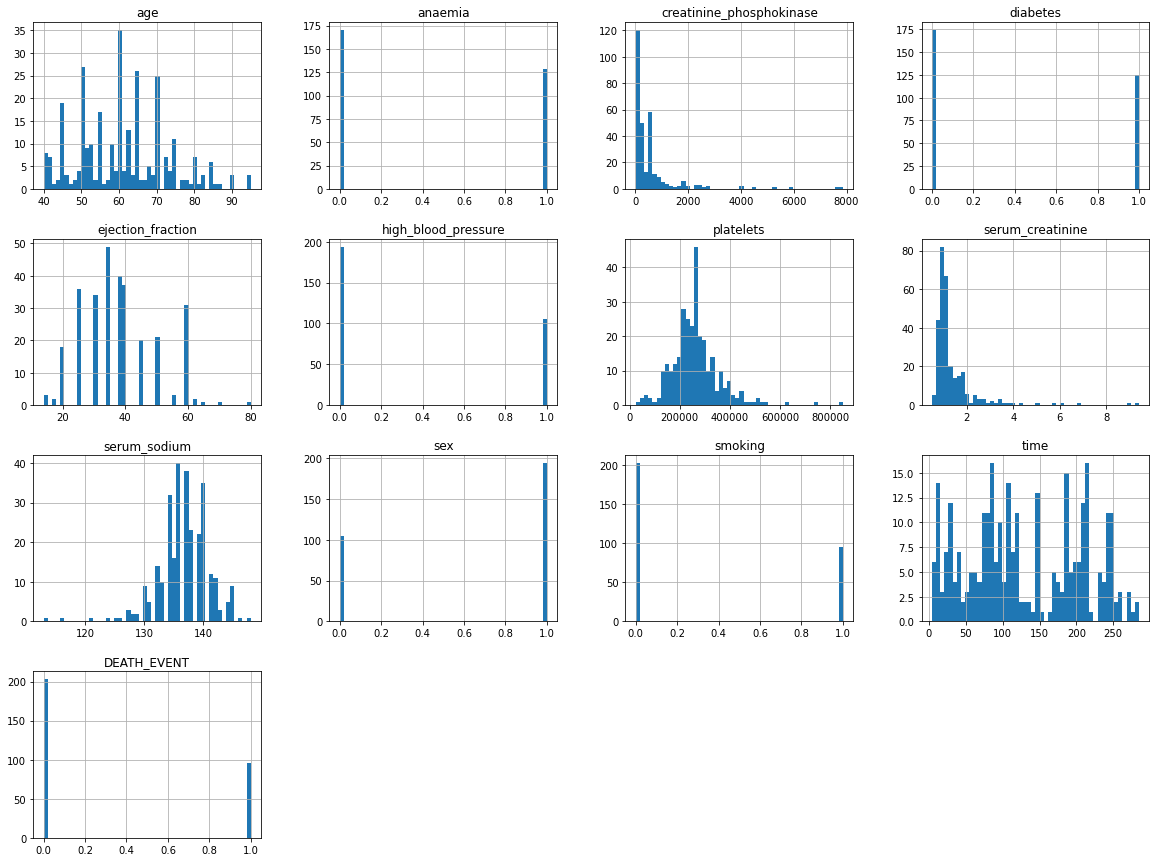

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt 
data.hist(bins = 50, figsize = (20,15))
plt.show()

In [72]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [73]:
data.isnull() # Checking if there are any missing values which could cause problems later with the program 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


# KNN IMPLEMENTATION

## KNN Class

In [74]:
from collections import Counter
import numpy as np

"""
K Nearest Neighbour class
Checks which samples the test sample is the closest to, using Euclidean Distance.
The nearest sample is used to classify the test sample

"""

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y): #Fit Method to get the training sample
        self.X_train = X
        self.y_train = y
        
    def euclidean_distance(self, v1, v2): # Takes in 2 lists, one for the test and one from the training 
        total_distance = 0.0
        # Go through each element of the list and calculate the distance between test and train sample
        for x in range (len(v1)): 
            difference = (v1[x] - v2[x])**2
            total_distance += difference
        return pow((total_distance),0.5)
    
    def predict(self, X):
        y_pred = [self.make_prediction(x) for x in X] # Storing the predictions in the y_pred list
        return np.array(y_pred) # Using numpy so mathematical calculations can be done on the answers

    def make_prediction(self, x):
        #Calculate the distance between the test samples and the training samples using the EC function and store in the distance list
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        #Sort by distance and get the index of the k nearest samples from the distance list
        kn_index = np.argsort(distances)[: self.k]
        #Get the labels of the K nearest samples in the training set
        k_nn_labels = [self.y_train[i] for i in kn_index]
        most_common = Counter(k_nn_labels).most_common()
        #Returning the most common label [0] returns the first list(most common) [0][0] returns the label
        return most_common[0][0]
    
    def accuracy(self, y_true, y_pred):
        #Calculates the accuracy by dividing the correct labels by the total number of labels in test sample
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy



# Cross Validation Function

In [75]:
"""
Cross Validation function 
Splits the data into the required folds and returns the accuracy result of each fold

"""

def cross_validation(predictor, x, y, folds=5):
    number_samples = len(y)
    fold_size = int(number_samples / folds) #int is used so we dont get float values, rounds the number down if float
    accuracy_scores = []
    for i in range(0,folds):
        # split data into train and test
        start = i * fold_size      # Each iteration will change the start and end point to make the new folds. The next iteration the start will be where the previous ended
        end = start + fold_size    
        x_test = x[start:end]      # Making a test samples of for each fold
        y_test = y[start:end] 
        
        x_train_data = np.concatenate((x[:start], x[end:]), axis=0)  # Joining the rest of the data together, which isn't in the test samples to make training sets
        x_train = x_train_data
        y_train_data = np.concatenate((y[:start], y[end:]), axis=0)
        y_train=y_train_data
        
        
        predictor.fit(x_train, y_train)       # Using the predictor algorithm to make predictions and then store the prediction scores in the accuracy array
        y_pred = predictor.predict(x_test)
        acc = predictor.accuracy(y_test,y_pred)
        accuracy_scores.append(acc)
    return np.array(accuracy_scores)

## Accessing Heart Failure Records Dataset

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Getting the data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 27)
y_train_data = train_set["DEATH_EVENT"] 
x_train_data = train_set.drop("DEATH_EVENT", axis=1) 


# Extracting the features and labels for the test samples
y_test_data = test_set['DEATH_EVENT']
x_test_data = test_set.drop("DEATH_EVENT", axis=1)
  
# Extracting the values from the dataset    
y_train =  y_train_data.values
x_train =  x_train_data.values
y_test =  y_test_data.values
x_test =  x_test_data.values


# Testing KNN on the Heart Failure Clinical Records dataset
#### Parameters can be changed to see how the accuracy score is affected


In [88]:
NN = KNN(15) # Parameter can be changed to test which K value gives the best accuracy score
NN.fit(x_train, y_train)
predictions = NN.predict(x_test)
acc = NN.accuracy(y_test, predictions)
print(acc)

0.8732394366197183


## Graph representation to check the optimal K for Heart Failure Clinical Records dataset and also see how changing K affects the accuracy score


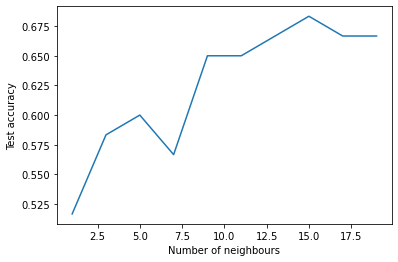

In [79]:
test_acc = []  

for knn in range(1,20,2):
    clf2 = KNN(knn)
    clf2.fit(x_train,y_train)
    prediction = clf2.predict(x_test)
    acc=clf2.accuracy(y_test,prediction)
    test_acc.append(acc)   
    
plt.plot([i*1 for i in range(1, 20,2)], test_acc)
plt.xlabel("Number of neighbours")
plt.ylabel("Test accuracy")
plt.show()

## Cross Validation Testing on the Heart Failure Clinical Records dataset
#### Folds Parameters can be changed to changed the numbers of folds to use in the cross-validation

In [89]:
y = data["DEATH_EVENT"]
x = data.drop("DEATH_EVENT", axis=1)
y_labels = y.values
x_features = x.values

nn = KNN(15)
scores = cross_validation(nn, x_features, y_labels, folds = 7)
print("Cross validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross validation scores: [0.11904762 0.35714286 0.80952381 0.78571429 0.73809524 0.80952381
 0.85714286]
Mean accuracy: 0.6394557823129251


# 

# Below cells perform the calculations on the FETAL HEALTH dataset

## Accessing Dataset 2:  Fetal Health - MultiClass

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split

data2 = pd.read_csv('fetal_health.csv')
train_set, test_set = train_test_split(data2, test_size = 0.2, random_state = 27)
y_train_data = train_set["fetal_health"] 
x_train_data = train_set.drop("fetal_health", axis=1) 

y_test_data = test_set['fetal_health']
x_test_data = test_set.drop("fetal_health", axis=1)
  

y_train =  y_train_data.values
x_train =  x_train_data.values
y_test =  y_test_data.values
x_test =  x_test_data.values

In [83]:
data2.shape

(2126, 22)

## Testing KNN on Fetal Health Dataset
#### Parameters can be changed to see how the accuracy score is affected

In [87]:
NN = KNN(3) #Parameter can be changed to test which K value gives the best accuracy score
NN.fit(x_train, y_train)
predictions = NN.predict(x_test)
print(predictions)
acc = NN.accuracy(y_test, predictions)
print(acc)

[1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 3. 2. 3. 1. 1. 1. 1. 3. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 3. 1. 1. 1. 2. 2. 1. 3. 2. 3. 1. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 3. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 2. 1.
 2. 1. 1. 3. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 3. 1. 1. 1. 2. 1. 3.
 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 3. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 3. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2. 3. 1. 1. 1. 1. 1.

## Graph representation to check the optimal K for Fetal Health dataset and also see how changing K affects the accuracy score
 

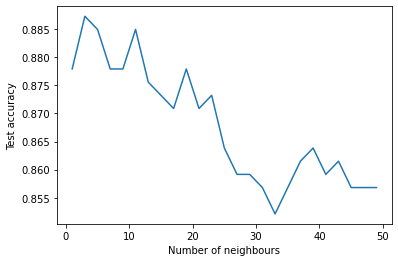

In [20]:
test_acc = []  

for knn in range(1,50,2):
    clf2 = KNN(knn)
    clf2.fit(x_train,y_train)
    prediction = clf2.predict(x_test)
    acc=clf2.accuracy(y_test,prediction)
    test_acc.append(acc)   
    
plt.plot([i*1 for i in range(1, 50,2)], test_acc)
plt.xlabel("Number of neighbours")
plt.ylabel("Test accuracy")
plt.show()

## Cross Validation testing on the dataset
#### Folds Parameters can be changed to changed the numbers of folds to use in the cross-validation

In [86]:
y = data2["fetal_health"]
x = data2.drop("fetal_health", axis=1)
y_labels = y.values
x_features = x.values

NN = KNN(3)
scores = cross_validation(NN, x_features, y_labels, folds = 5)
print("Cross validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross validation scores: [0.77176471 0.74823529 0.97411765 0.87294118 0.74117647]
Mean accuracy: 0.8216470588235294
